In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
# Load CSV files
ssd_data = pd.read_csv('ssd.csv')
hdd_data = pd.read_csv('hdd.csv')

In [65]:
# Convert hex transfer length to integer
ssd_data['xfrlen'] = ssd_data['xfrlen'].apply(lambda x: int(x, 16))
hdd_data['xfrlen'] = hdd_data['xfrlen'].apply(lambda x: int(x, 16))

In [67]:
# Convert response time and completion time to ms
ssd_data['response_ms'] = ssd_data['response'] / 1000
hdd_data['response_ms'] = hdd_data['response'] / 1000
ssd_data['Completion time (ms)'] = ssd_data['Completion time'] / 1000
hdd_data['Completion time (ms)'] = hdd_data['Completion time'] / 1000

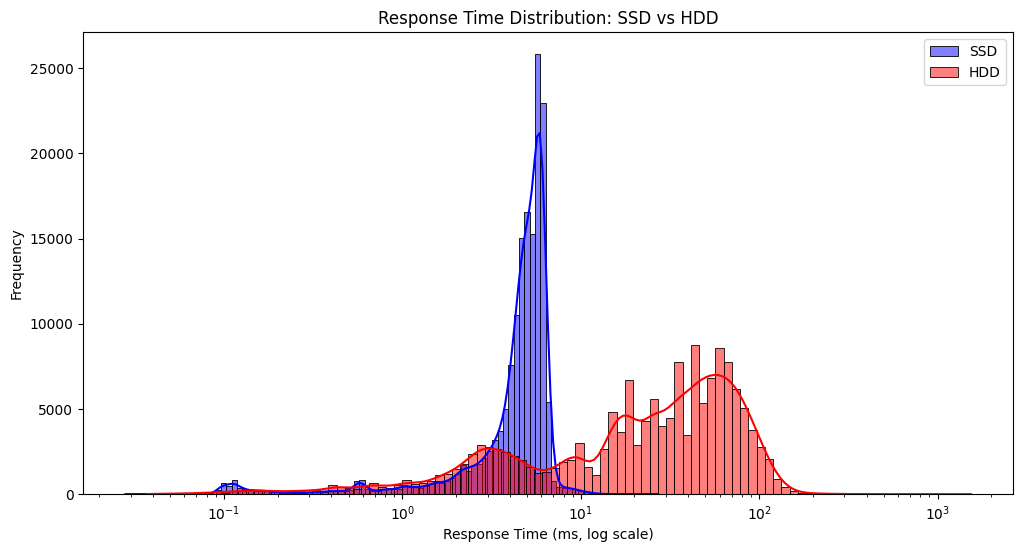

In [69]:
# Response Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(ssd_data["response_ms"], bins=100, color="blue", label="SSD", kde=True, log_scale=True)
sns.histplot(hdd_data["response_ms"], bins=100, color="red", label="HDD", kde=True, log_scale=True)
plt.xlabel("Response Time (ms, log scale)")
plt.ylabel("Frequency")
plt.title("Response Time Distribution: SSD vs HDD")
plt.legend()
plt.show()

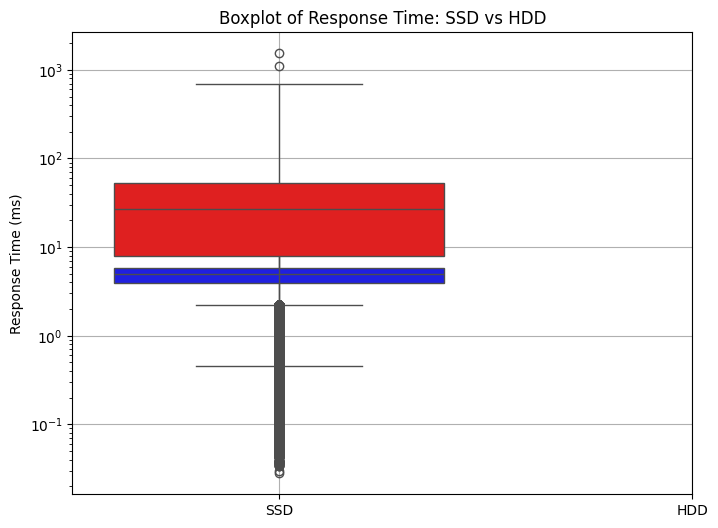

In [70]:
# Response Time Distribution - boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data= ssd_data["response_ms"], color="blue", log_scale=True)
sns.boxplot(data= hdd_data["response_ms"], color="red", log_scale=True)
plt.xticks([0, 1], ["SSD", "HDD"])
plt.ylabel("Response Time (ms)")
plt.yscale("log")  # Log scale to handle outliers
plt.title("Boxplot of Response Time: SSD vs HDD")
plt.grid(True)
plt.show()

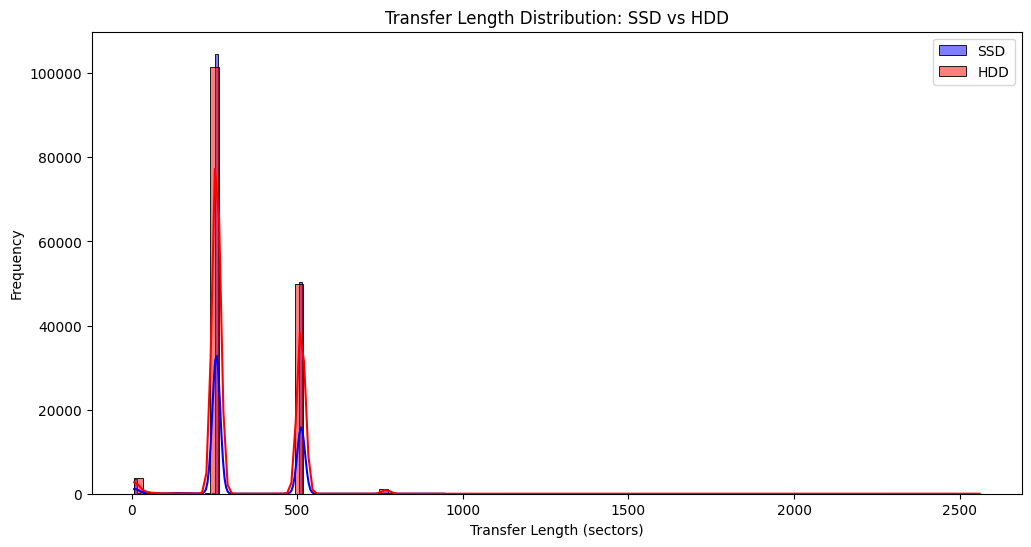

In [71]:
# Transfer Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(ssd_data["xfrlen"], bins=100, color="blue", label="SSD", kde=True)
sns.histplot(hdd_data["xfrlen"], bins=100, color="red", label="HDD", kde=True)
plt.xlabel("Transfer Length (sectors)")
plt.ylabel("Frequency")
plt.title("Transfer Length Distribution: SSD vs HDD")
plt.legend()
plt.show()

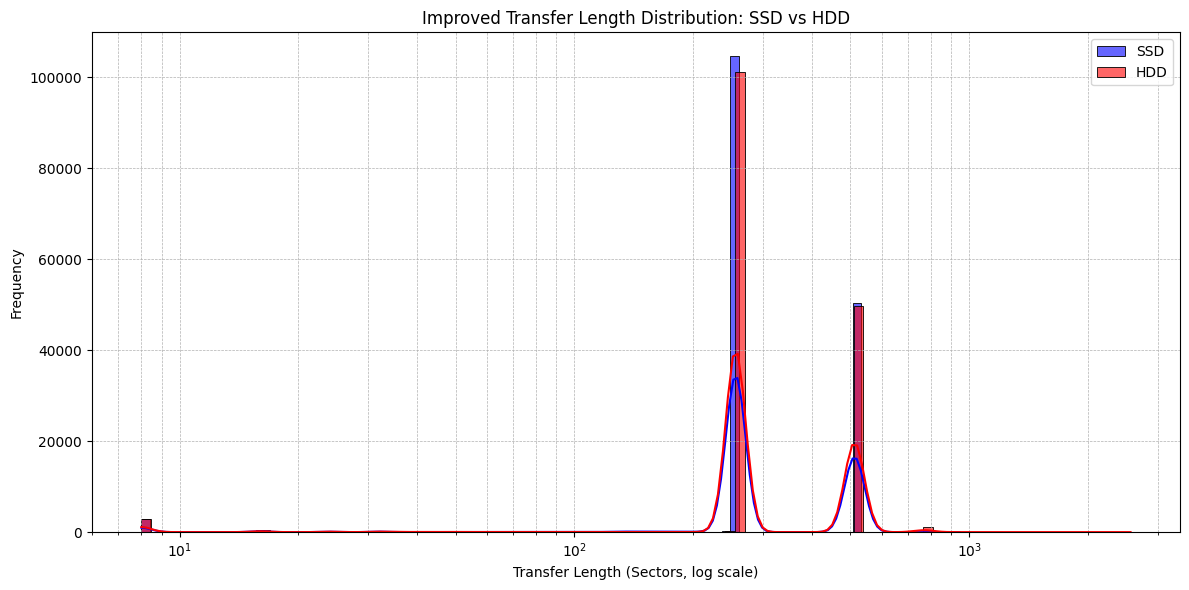

In [72]:
# Zoomed-in Transfer Length Distribution Plot
plt.figure(figsize=(12, 6))

# Normalize histograms and use log scale for x-axis
sns.histplot(
    ssd_data["xfrlen"], bins=100, color="blue", label="SSD", kde=True,
    log_scale=(True, False), alpha=0.6
)
sns.histplot(
    hdd_data["xfrlen"], bins=100, color="red", label="HDD", kde=True,
    log_scale=(True, False), alpha=0.6
)


# Customize plot aesthetics
plt.xlabel("Transfer Length (Sectors, log scale)")
plt.ylabel("Frequency")
plt.title("Improved Transfer Length Distribution: SSD vs HDD")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


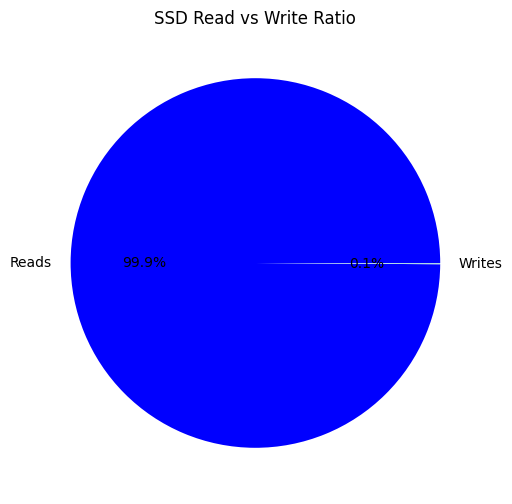

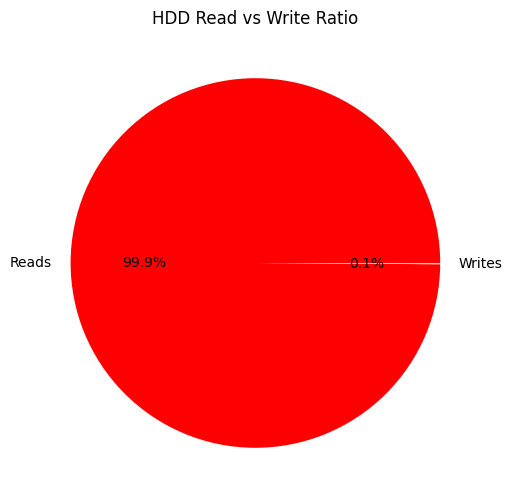

In [73]:
# Count reads (0x88) and writes (0x8A)
ssd_reads = (ssd_data["opcode"] == "0x88").sum()
ssd_writes = (ssd_data["opcode"] == "0x8A").sum()

hdd_reads = (ssd_data["opcode"] == "0x88").sum()
hdd_writes = (ssd_data["opcode"] == "0x8A").sum()

# Pie chart for SSD
plt.figure(figsize=(6, 6))
plt.pie([ssd_reads, ssd_writes], labels=["Reads", "Writes"], autopct="%1.1f%%", colors=["blue", "lightblue"])
plt.title("SSD Read vs Write Ratio")
plt.show()

# Pie chart for HDD
plt.figure(figsize=(6, 6))
plt.pie([hdd_reads, hdd_writes], labels=["Reads", "Writes"], autopct="%1.1f%%", colors=["red", "pink"])
plt.title("HDD Read vs Write Ratio")
plt.show()

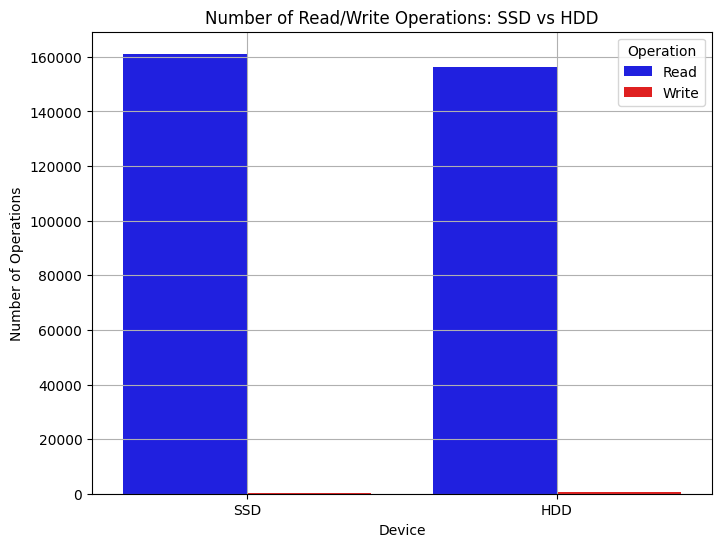

In [85]:
# Create a DataFrame for easy plotting
rw_comparison = pd.DataFrame({
    "Device": ["SSD", "SSD", "HDD", "HDD"],
    "Operation": ["Read", "Write", "Read", "Write"],
    "Count": [ssd_reads, ssd_writes, hdd_reads, hdd_writes]
})

# Bar chart comparing Read/Write operations
plt.figure(figsize=(8, 6))
sns.barplot(x="Device", y="Count", hue="Operation", data=rw_comparison, palette=["blue", "red"])
plt.ylabel("Number of Operations")
plt.title("Number of Read/Write Operations: SSD vs HDD")
plt.grid(True)
plt.show()


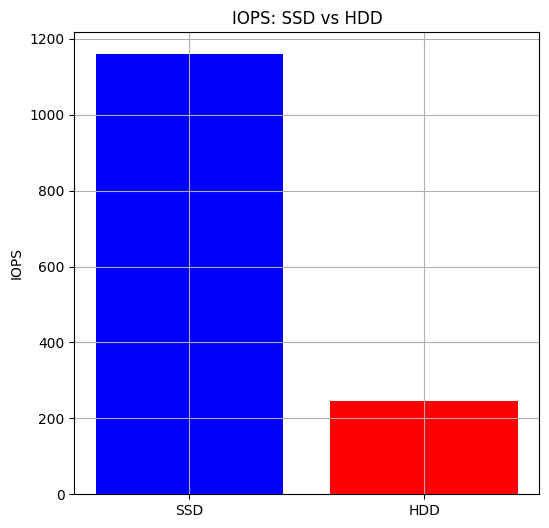

In [83]:
# IOPS (Input/Output Operations Per Second)
# Compute total time as the difference between max and min completion time
ssd_time_sec = (ssd_data["Completion time"].max() - ssd_data["Completion time"].min()) / 1e6
hdd_time_sec = (hdd_data["Completion time"].max() - hdd_data["Completion time"].min()) / 1e6

# Calculate IOPS correctly
ssd_iops = len(ssd_data) / ssd_time_sec
hdd_iops = len(hdd_data) / hdd_time_sec

# Bar chart for IOPS
plt.figure(figsize=(6, 6))
plt.bar(["SSD", "HDD"], [ssd_iops, hdd_iops], color=["blue", "red"])
plt.ylabel("IOPS")
plt.title("IOPS: SSD vs HDD")
plt.grid(True)
plt.show()

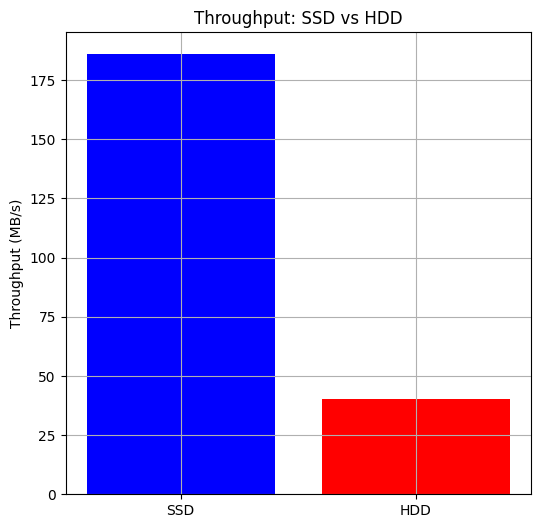

In [76]:
# Convert transfer length from sectors to MB (1 sector = 512 bytes)
ssd_mb_transferred = (ssd_data["xfrlen"].sum() * 512) / (1024 * 1024)
hdd_mb_transferred = (hdd_data["xfrlen"].sum() * 512) / (1024 * 1024)

# Compute throughput in MB/s
ssd_throughput = ssd_mb_transferred / ssd_time_sec
hdd_throughput = hdd_mb_transferred / hdd_time_sec

# Bar chart for throughput
plt.figure(figsize=(6, 6))
plt.bar(["SSD", "HDD"], [ssd_throughput, hdd_throughput], color=["blue", "red"])
plt.ylabel("Throughput (MB/s)")
plt.title("Throughput: SSD vs HDD")
plt.grid(True)
plt.show()


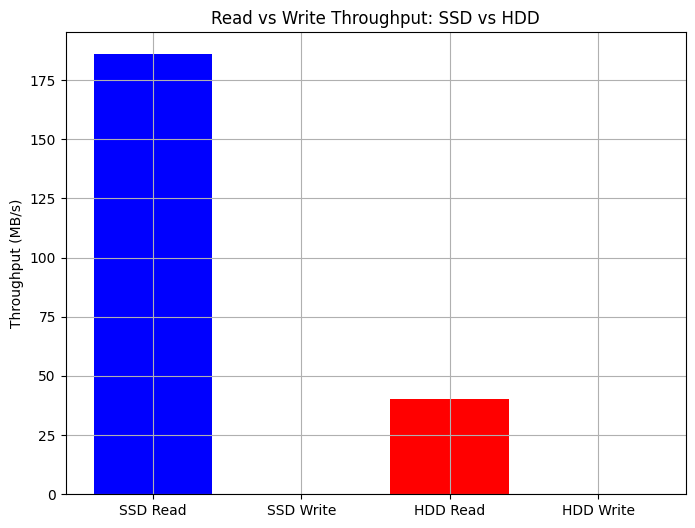

In [84]:
# Read and write throughput separately
ssd_read_mb = (ssd_data[ssd_data["opcode"] == "0x88"]["xfrlen"].sum() * 512) / (1024 * 1024)
ssd_write_mb = (ssd_data[ssd_data["opcode"] == "0x8A"]["xfrlen"].sum() * 512) / (1024 * 1024)

hdd_read_mb = (hdd_data[hdd_data["opcode"] == "0x88"]["xfrlen"].sum() * 512) / (1024 * 1024)
hdd_write_mb = (hdd_data[hdd_data["opcode"] == "0x8A"]["xfrlen"].sum() * 512) / (1024 * 1024)

# Compute read/write throughput in MB/s
ssd_read_throughput = ssd_read_mb / ssd_time_sec
ssd_write_throughput = ssd_write_mb / ssd_time_sec

hdd_read_throughput = hdd_read_mb / hdd_time_sec
hdd_write_throughput = hdd_write_mb / hdd_time_sec

# Bar chart for read/write throughput
plt.figure(figsize=(8, 6))
plt.bar(["SSD Read", "SSD Write", "HDD Read", "HDD Write"],
        [ssd_read_throughput, ssd_write_throughput, hdd_read_throughput, hdd_write_throughput],
        color=["blue", "lightblue", "red", "pink"])
plt.ylabel("Throughput (MB/s)")
plt.title("Read vs Write Throughput: SSD vs HDD")
plt.grid(True)
plt.show()


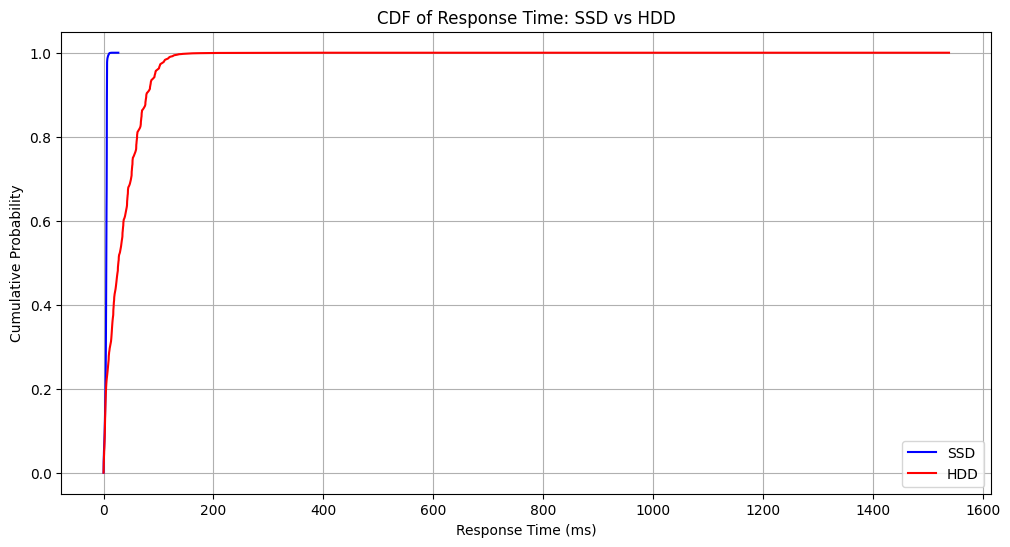

In [77]:
# Sort and compute CDF (Cumulative Distribution Function)
ssd_sorted = np.sort(ssd_data["response_ms"])
hdd_sorted = np.sort(hdd_data["response_ms"])

ssd_cdf = np.arange(len(ssd_sorted)) / len(ssd_sorted)
hdd_cdf = np.arange(len(hdd_sorted)) / len(hdd_sorted)

plt.figure(figsize=(12, 6))
plt.plot(ssd_sorted, ssd_cdf, label="SSD", color="blue")
plt.plot(hdd_sorted, hdd_cdf, label="HDD", color="red")

plt.xlabel("Response Time (ms)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Response Time: SSD vs HDD")
plt.legend()
plt.grid(True)
plt.show()

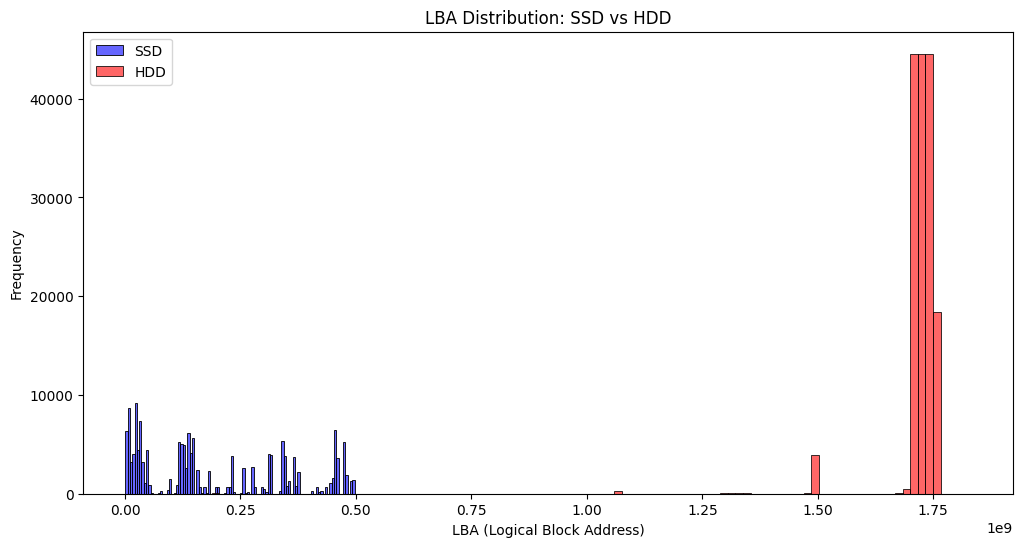

In [78]:
# Convert LBA from hex to decimal
ssd_data["lba"] = ssd_data["lba"].apply(lambda x: int(x, 16))
hdd_data["lba"] = hdd_data["lba"].apply(lambda x: int(x, 16))

# Plot LBA distributions
plt.figure(figsize=(12, 6))
sns.histplot(ssd_data["lba"], bins=100, color="blue", label="SSD", alpha=0.6)
sns.histplot(hdd_data["lba"], bins=100, color="red", label="HDD", alpha=0.6)
plt.xlabel("LBA (Logical Block Address)")
plt.ylabel("Frequency")
plt.title("LBA Distribution: SSD vs HDD")
plt.legend()
plt.show()


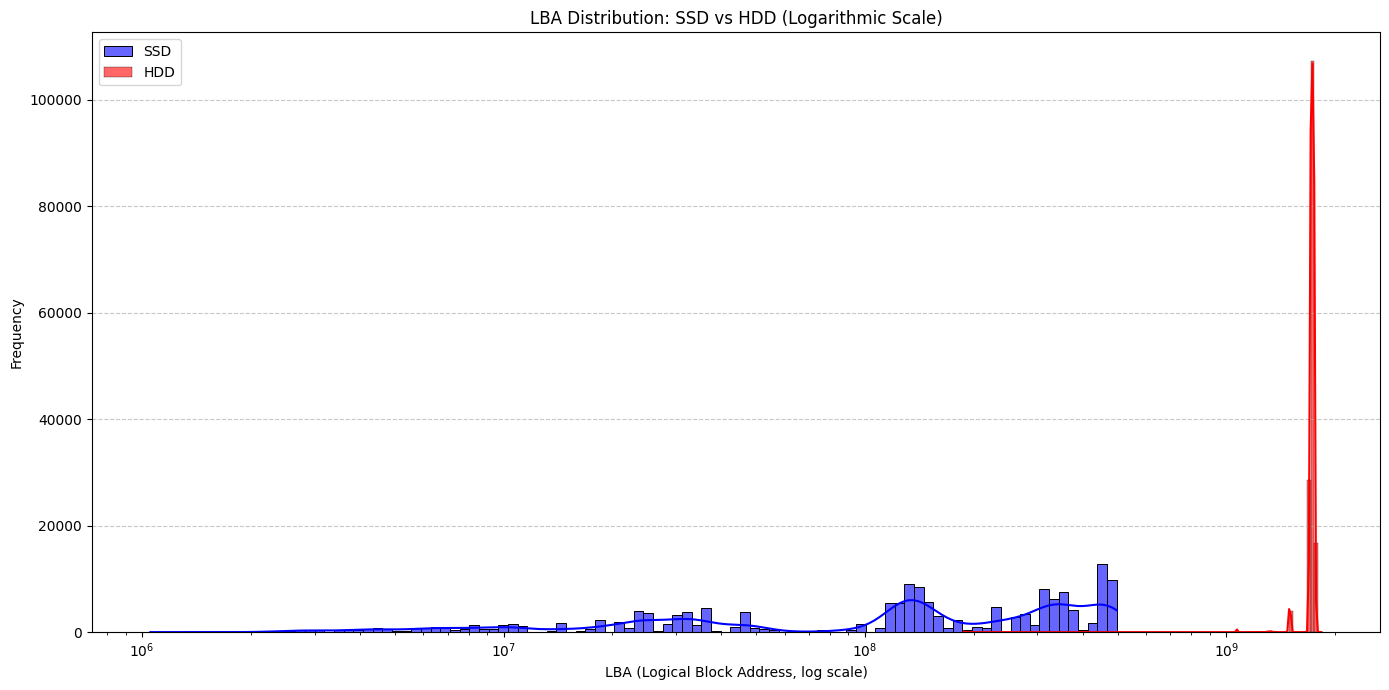

In [79]:
# Plot LBA distributions with log scale
plt.figure(figsize=(14, 7))

# SSD histogram with KDE
sns.histplot(
    ssd_data["lba"], bins=100, color="blue", label="SSD", kde=True, alpha=0.6, log_scale=(True, False)
)

# HDD histogram with KDE
sns.histplot(
    hdd_data["lba"], bins=100, color="red", label="HDD", kde=True, alpha=0.6, log_scale=(True, False)
)

# Add labels and title
plt.xlabel("LBA (Logical Block Address, log scale)")
plt.ylabel("Frequency")
plt.title("LBA Distribution: SSD vs HDD (Logarithmic Scale)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

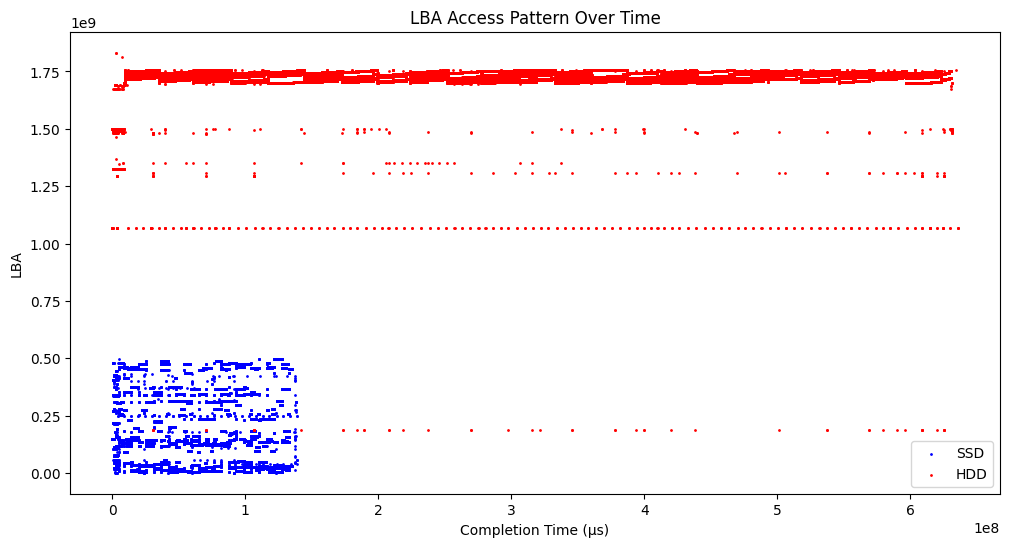

In [80]:
plt.figure(figsize=(12, 6))
plt.scatter(ssd_data["Completion time"], ssd_data["lba"], color="blue", s=1, label="SSD")
plt.scatter(hdd_data["Completion time"], hdd_data["lba"], color="red", s=1, label="HDD")
plt.xlabel("Completion Time (µs)")
plt.ylabel("LBA")
plt.title("LBA Access Pattern Over Time")
plt.legend()
plt.show()
